In [154]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [155]:
wine_ds=pd.read_csv("redAndWhite.csv")
wine_ds.shape

(6497, 13)

<Axes: xlabel='quality', ylabel='pH'>

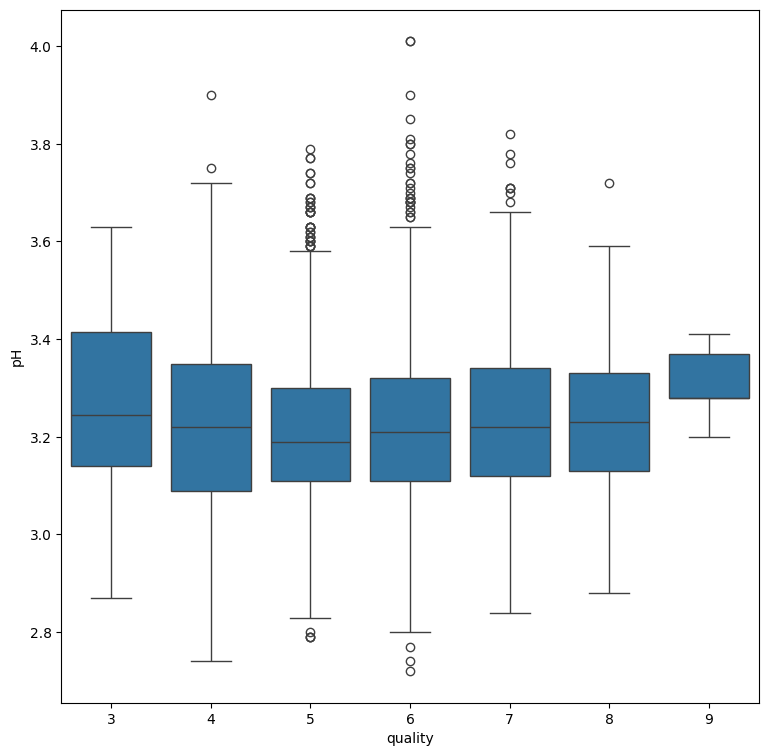

In [156]:
plt.figure(figsize=(9,9))
sns.boxplot(data=wine_ds ,x="quality",y="pH")

C:\Users\MOHD NASIR\AppData\Local\Temp\ipykernel_14400\3659745135.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_ds["residual sugar"])


<Axes: xlabel='residual sugar', ylabel='Density'>

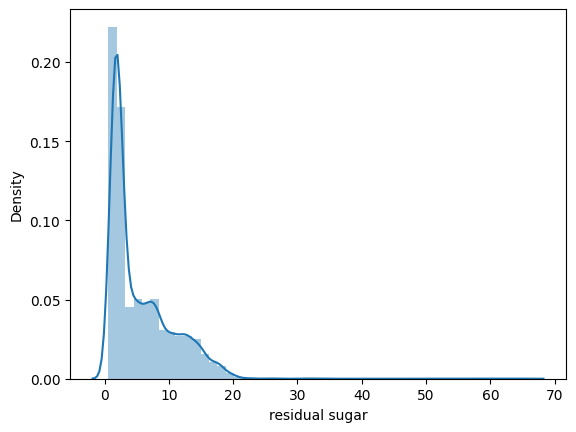

In [157]:
sns.distplot(wine_ds["residual sugar"])

<Axes: xlabel='residual sugar'>

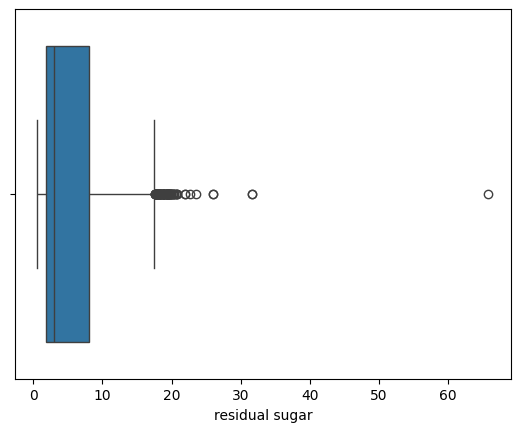

In [158]:
sns.boxplot(x=wine_ds["residual sugar"])

In [159]:
upper_limit = wine_ds['alcohol'].mean()+3*wine_ds['alcohol'].std()
lower_limit = wine_ds['alcohol'].mean()-3*wine_ds['alcohol'].std() 
print('upperlimit',upper_limit)
print('lowerlimit',lower_limit)

upperlimit 14.069936077756397
lowerlimit 6.913665584542512


In [160]:
wine_ds.loc[(wine_ds['alcohol']>upper_limit) & (wine_ds['alcohol']<lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [161]:
upper_limit = wine_ds['residual sugar'].mean()+3*wine_ds['residual sugar'].std()
lower_limit = wine_ds['residual sugar'].mean()-3*wine_ds['residual sugar'].std() 
print('upperlimit',upper_limit)
print('lowerlimit',lower_limit)
wine_ds.loc[(wine_ds['residual sugar']>upper_limit) & (wine_ds['residual sugar']<lower_limit)]
new_df=wine_ds.loc[(wine_ds['residual sugar']<upper_limit) & (wine_ds['residual sugar']>lower_limit)]
print(len(new_df))

upperlimit 19.716646568829663
lowerlimit -8.830175890054846
6471


In [162]:
new_df=wine_ds.loc[(wine_ds['residual sugar']<upper_limit) & (wine_ds['residual sugar']>lower_limit)]
print(len(new_df))

6471


In [163]:
new_df.describe

<bound method NDFrame.describe of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
5     white            8.1             0.280         0.40             6.9   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  tot

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming wine_ds is your DataFrame
columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
           "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

# DataFrame to store the upper limit, lower limit, and number of outliers removed
newadd = pd.DataFrame(columns=["Column", "Upper Limit", "Lower Limit", "Number of Outliers Removed"])

# DataFrame to store data without outliers
new_df = wine_ds.copy()

# List to store details for newadd DataFrame
details = []

# Loop through each column
for col in columns:
    # Calculate upper and lower limits
    upper_limit = wine_ds[col].mean() + 3 * wine_ds[col].std()
    lower_limit = wine_ds[col].mean() - 3 * wine_ds[col].std()
    
    # Identify outliers
    outliers = new_df.loc[(new_df[col] > upper_limit) | (new_df[col] < lower_limit)]
    num_outliers = len(outliers)
    
    # Remove outliers
    new_df = new_df.loc[(new_df[col] <= upper_limit) & (new_df[col] >= lower_limit)]
    
    # Store details in a list
    details.append({
        "Column": col,
        "Upper Limit": upper_limit,
        "Lower Limit": lower_limit,
        "Number of Outliers Removed": num_outliers
    })

# Convert list to DataFrame
newadd = pd.DataFrame(details)

# Print the newadd DataFrame
print(newadd)

# Print the number of rows in the new DataFrame without outliers
print(f"Number of rows in new_df without outliers: {len(new_df)}")

                  Column  Upper Limit  Lower Limit  Number of Outliers Removed
0          fixed acidity    11.104608     3.326006                         128
1       volatile acidity     0.833575    -0.154243                          94
2            citric acid     0.754587    -0.117320                          25
3         residual sugar    19.716647    -8.830176                          24
4              chlorides     0.161135    -0.049067                          97
5    free sulfur dioxide    83.773519   -22.722880                          36
6   total sulfur dioxide   285.310138   -53.820989                           4
7                density     1.003693     0.985701                           0
8                     pH     3.700862     2.736139                          31
9              sulphates     0.977686     0.084851                          48
10               alcohol    14.069936     6.913666                           1
Number of rows in new_df without outliers: 6009


In [258]:
new_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,NaN,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,NaN,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,NaN,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,NaN,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,NaN,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,NaN,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,NaN,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,NaN,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,NaN,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


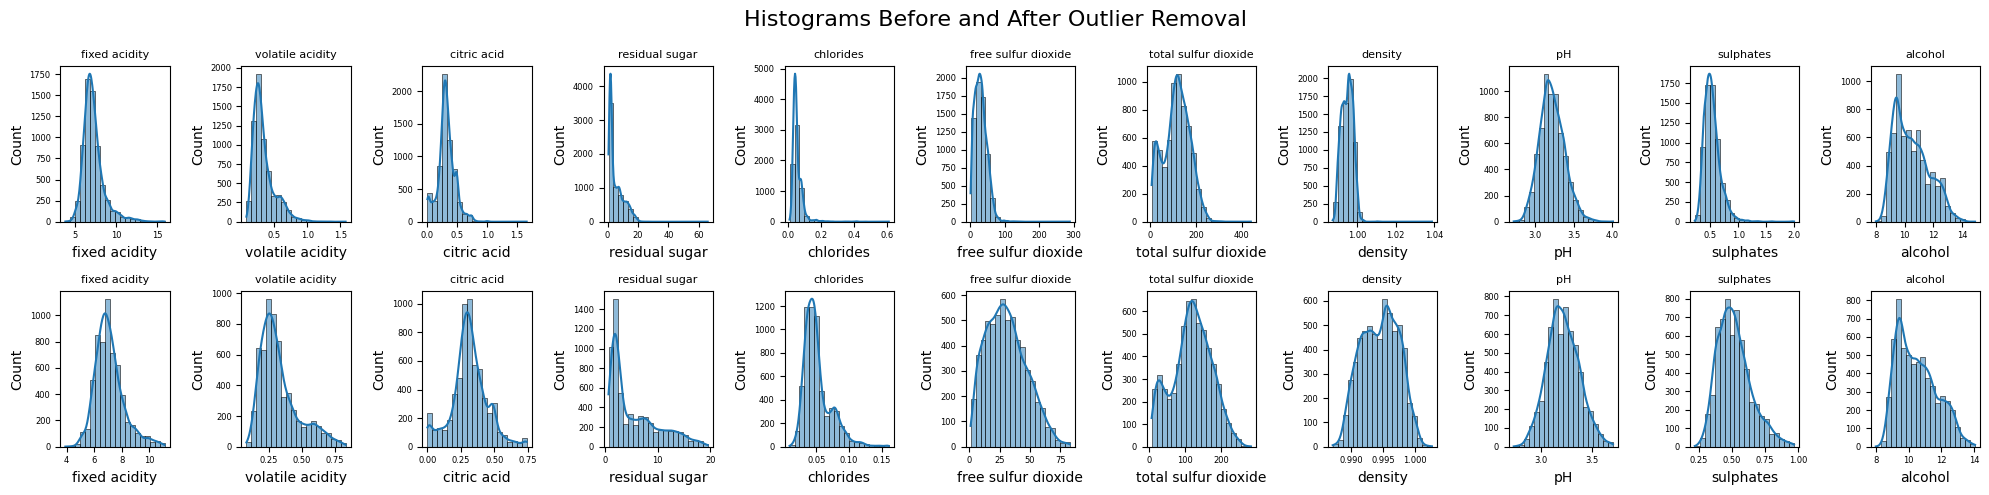

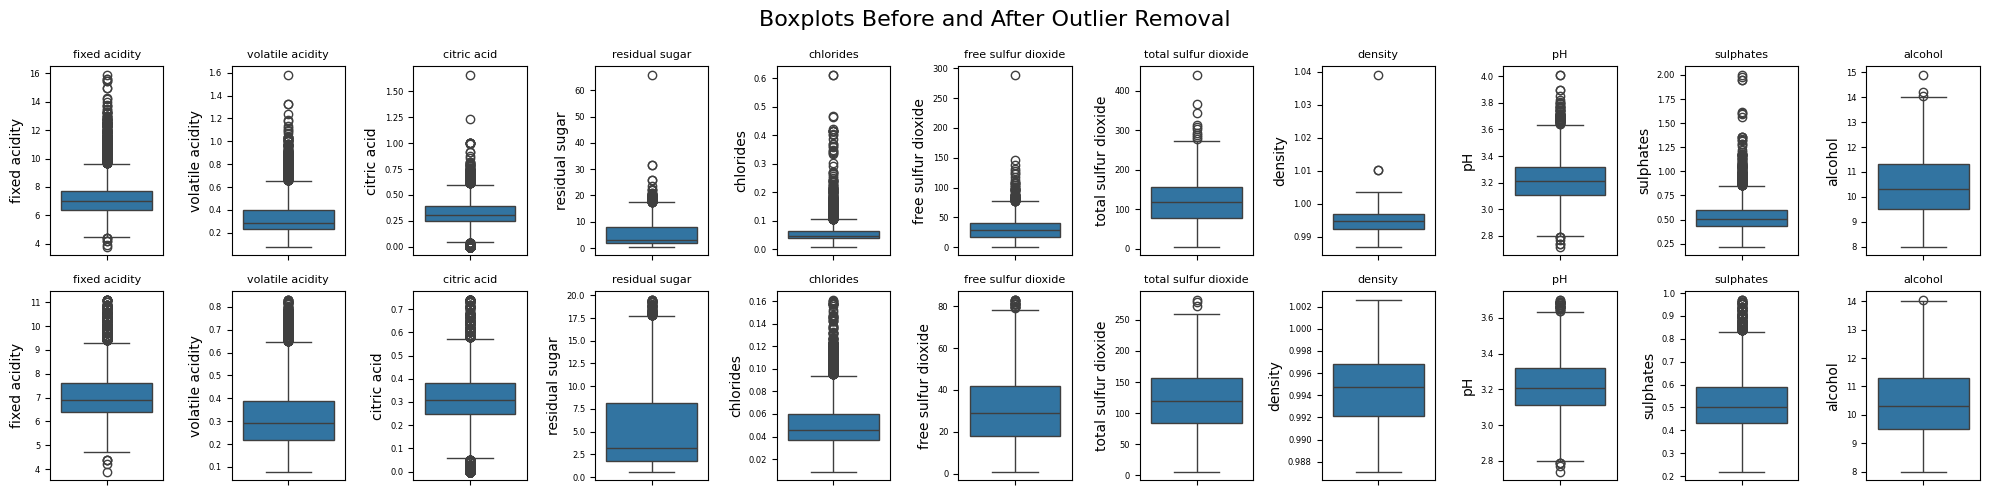

In [165]:
# Create subplots for histograms
fig, axes = plt.subplots(2, 11, figsize=(20, 5))  # 2 rows, 11 columns
fig.suptitle("Histograms Before and After Outlier Removal", fontsize=16)

# Iterate through columns and plot histograms
for i, col in enumerate(columns):
    # Histogram before removing outliers
    sns.histplot(wine_ds[col], bins=20, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'{col}', fontsize=8)
    axes[0, i].tick_params(axis='both', labelsize=6)

    # Histogram after removing outliers
    sns.histplot(new_df[col], bins=20, kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'{col}', fontsize=8)
    axes[1, i].tick_params(axis='both', labelsize=6)

fig.tight_layout()
plt.show()


# Create subplots for boxplots
fig, axes = plt.subplots(2, 11, figsize=(20, 5))  # 2 rows, 11 columns
fig.suptitle("Boxplots Before and After Outlier Removal", fontsize=16)

# Iterate through columns and plot boxplots
for i, col in enumerate(columns):
    # Boxplot before removing outliers
    sns.boxplot(y=wine_ds[col], ax=axes[0, i])
    axes[0, i].set_title(f'{col}', fontsize=8)
    axes[0, i].tick_params(axis='both', labelsize=6)

    # Boxplot after removing outliers
    sns.boxplot(y=new_df[col], ax=axes[1, i])
    axes[1, i].set_title(f'{col}', fontsize=8)
    axes[1, i].tick_params(axis='both', labelsize=6)

fig.tight_layout()
plt.show()

In [245]:
new_df['type'] = new_df['type'].map({'red': 0, 'white': 1})
#new_df = new_df[(wine_ds['quality'] > 4) & (wine_ds['quality'] < 8)]
X=new_df.drop('quality',axis=1)
Y=new_df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)


#train test  split
X_train , X_test , Y_train ,Y_test= train_test_split(X , Y , test_size=0.2 , random_state=62)

In [246]:
print(Y.shape , Y_train.shape, Y_test.shape)


(6009,) (4807,) (1202,)


In [250]:
from sklearn.linear_model import  LinearRegression
from sklearn.linear_model import  LogisticRegression
model=LinearRegression()
model.fit(X_train,Y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
X_test_preedection=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_preedection,Y_test)
print('accuracy :', test_data_accuracy)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [252]:
results_df = pd.DataFrame(columns=['Random State', 'Precision'])

for random_state in range(1, 101):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=random_state)

    model = LogisticRegression()
    model.fit(X_train, Y_train)

    X_test_prediction = model.predict(X_test)
    precision = precision_score(Y_test, X_test_prediction , average='micro')

    # Use pd.concat instead of append
    results_df = pd.concat([results_df, pd.DataFrame({'Random State': [random_state], 'Precision': [precision]})], ignore_index=True)
    results_df=results_df.sort_values(by='Precision' , ascending=True)

print(results_df)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
results_df

,Random State,Precision
0,95,0.722222
1,6,0.740385
2,4,0.751073
3,22,0.755556
4,1,0.760369
...,...,...
94,13,0.857143
95,35,0.862832
96,61,0.866667
97,32,0.867647


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




Y_pred = model.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
input_data=(1,8.1,0.87,0.0,3.3,0.096,26.0,61.0,1.00025,3.6,0.72,9.8)
#changing the input data in numpy array
input_data_as_nparray=np.asarray(input_data)
#reshaping the data as we are predecting for only one value
input_data_reshape=input_data_as_nparray.reshape(1,-1)

predection=model.predict(input_data_reshape)
print(predection)

[0]


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
